# 0.数据导入

In [46]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [48]:
#train数据
train_action = pd.read_csv('./数据/train/action.csv',encoding='gbk')
train_orderHistory = pd.read_csv('./数据/train/orderHistory.csv',encoding='gbk')
train_orderLabel = pd.read_csv('./数据/train/orderLabel.csv',encoding='gbk')
train_userComment = pd.read_csv('./数据/train/userComment.csv',encoding='gbk')
train_userProfile = pd.read_csv('./数据/train/userProfile.csv',encoding='gbk')

In [49]:
#test数据
test_action = pd.read_csv('./数据/test/action.csv',encoding='gbk')
test_orderHistory = pd.read_csv('./数据/test/orderHistory.csv',encoding='gbk')
test_orderLabel = pd.read_csv('./数据/test/orderLabel.csv',encoding='gbk')
test_userComment = pd.read_csv('./数据/test/userComment.csv',encoding='gbk')
test_userProfile = pd.read_csv('./数据/test/userProfile.csv',encoding='gbk')

# 数据查看拼接

In [50]:
print('1.train_action的shape:',train_action.shape)
print('2.train_orderHistory的shape:',train_orderHistory.shape)
print('3.train_orderLabel的shape:',train_orderLabel.shape)
print('4.train_userComment的shape:',train_userComment.shape)
print('5.train_userProfile的shape:',train_userProfile.shape)


1.train_action的shape: (1334856, 3)
2.train_orderHistory的shape: (20653, 7)
3.train_orderLabel的shape: (40307, 2)
4.train_userComment的shape: (9863, 5)
5.train_userProfile的shape: (40307, 4)


In [51]:
train_action

,userid,actionType,actionTime
0,100000000013,1,1632067153
1,100000000013,5,1632067163
2,100000000013,6,1632067274
3,100000000013,5,1632067311
4,100000000013,6,1632067336
...,...,...,...
1334851,114999782736,6,1640303048
1334852,114999782736,1,1640335668
1334853,114999782736,5,1640335675
1334854,114999782736,5,1640335755


In [52]:
#合并数据，进行全部用户的数据分析
#根据用户id进行拼接
data_userProfile = pd.concat([train_userProfile,test_userProfile],axis=0)
data_action = pd.concat([train_action,test_action],axis=0)
data_userComment = pd.concat([train_userComment,test_userComment],axis=0)
data_orderHistory = pd.concat([train_orderHistory,test_orderHistory],axis=0)
data_orderLabel = pd.concat([train_orderLabel,test_orderLabel],axis=0)


In [53]:
print('1.data_userProfile的shape:',data_userProfile.shape)
print('2.data_action的shape:',data_action.shape)
print('3.data_userComment的shape:',data_userComment.shape)
print('4.data_orderHistory的shape:',data_orderHistory.shape)
print('5.data_orderLabel的shape:',data_orderLabel.shape)

1.data_userProfile的shape: (50383, 4)
2.data_action的shape: (1666060, 3)
3.data_userComment的shape: (12337, 5)
4.data_orderHistory的shape: (25712, 7)
5.data_orderLabel的shape: (50383, 2)


# 1.数据探索

### usid在各表的情况

In [54]:
#set返回一个集合，其中所有的重复元素都被去除了
len(set(data_userProfile['userid']))

50383

In [55]:
len(set(data_action['userid']))

50383

In [56]:
len(set(data_userComment['userid']))

12337

In [57]:
len(set(data_orderHistory['userid']))

13323

In [58]:
len(set(data_orderLabel['userid']))

50383

### 有历史订单，没有评价记录 的用户

In [59]:
len(set(data_orderHistory['userid'])-set(data_userComment['userid']))

5424

### 有评价记录，没有历史订单的用户

In [60]:
len(set(data_userComment['userid'])-set(data_orderHistory['userid']))

4438

# 训练集和测试集的userid的分布情况

In [61]:
#历史订单
userid1 = set(train_orderHistory.userid)
userid2 = set(test_orderHistory.userid)
len(userid1)

10637

In [62]:
len(userid1-userid2) #这里表明，测试集和训练集的用户完全独立

10637

In [63]:
#用户信息
userid3 = set(train_userProfile.userid)
userid4 = set(test_userProfile.userid)
len(userid3),len(userid3-userid4)#这里表明，测试集和训练集的用户完全独立

(40307, 40307)

In [64]:
#用户评论
userid5 = set(train_userComment.userid)
userid6 = set(test_userComment.userid)
len(userid5),len(userid5-userid6)#这里表明，测试集和训练集的用户完全独立

(9863, 9863)

### 1.订单数据有缺失，以下分析是建立在有缺失数据的前提下
### 2.训练集和测试集的用户数据完全独立

# 用户信息分析

## 用户地区分布

In [65]:
data_userProfile

,userid,gender,province,age
0,100000000013,男,NaN,60后
1,100000000111,NaN,上海,NaN
2,100000000127,NaN,上海,NaN
3,100000000231,男,北京,70后
4,100000000379,男,北京,NaN
...,...,...,...,...
10071,114869469143,女,重庆,NaN
10072,114869567540,男,山东,80后
10073,114869867343,NaN,广东,70后
10074,114869967040,男,浙江,NaN


In [66]:
print(plt.style.available)

['Solarize_Light2', '_classic_test_patch', '_mpl-gallery', '_mpl-gallery-nogrid', 'bmh', 'classic', 'dark_background', 'fast', 'fivethirtyeight', 'ggplot', 'grayscale', 'seaborn-v0_8', 'seaborn-v0_8-bright', 'seaborn-v0_8-colorblind', 'seaborn-v0_8-dark', 'seaborn-v0_8-dark-palette', 'seaborn-v0_8-darkgrid', 'seaborn-v0_8-deep', 'seaborn-v0_8-muted', 'seaborn-v0_8-notebook', 'seaborn-v0_8-paper', 'seaborn-v0_8-pastel', 'seaborn-v0_8-poster', 'seaborn-v0_8-talk', 'seaborn-v0_8-ticks', 'seaborn-v0_8-white', 'seaborn-v0_8-whitegrid', 'tableau-colorblind10']


In [67]:
import seaborn as sns
import matplotlib.pyplot as plt
plt.style.use('classic') #风格,print(plt.style.available)查看更多风格
plt.rcParams['font.sans-serif'] = ['SimHei']
plt.rcParams['axes.unicode_minus'] = False


In [68]:
#求一下缺失率
data_userProfile.province.isna().sum() / data_userProfile.shape[0]

0.0972351785324415

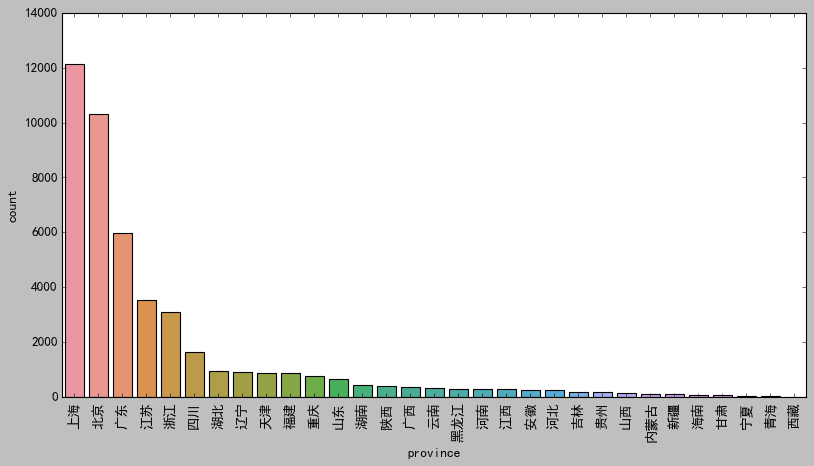

In [69]:
plt.figure(figsize=(12,6))
#直方图,每个省份的人数
sns.countplot(data = data_userProfile,
              x = 'province',
              order = data_userProfile.province.value_counts().index.tolist(),#按照从多到少排序
              
              )
plt.xticks(rotation=90)
plt.show()

In [70]:
#前六城市的占比
(data_userProfile.province.value_counts() / data_userProfile.province.value_counts().sum()).head(6).sum()

0.8075367162078974

### 综上可得，用户信息中，城市信息缺失率9.7%，其中用户来源前6的省份数量占了全部用户的80%，即【北上广江浙川】是用户主体

In [71]:
#用户地区分布的直方图
data_userProfile

,userid,gender,province,age
0,100000000013,男,NaN,60后
1,100000000111,NaN,上海,NaN
2,100000000127,NaN,上海,NaN
3,100000000231,男,北京,70后
4,100000000379,男,北京,NaN
...,...,...,...,...
10071,114869469143,女,重庆,NaN
10072,114869567540,男,山东,80后
10073,114869867343,NaN,广东,70后
10074,114869967040,男,浙江,NaN


In [72]:
data_province_user = data_userProfile[['province','userid']].groupby('province').agg('count').sort_values(by='userid', ascending=False) #ascending=False从高到低排序
data_province_user

,userid
province,
上海,12143
北京,10325
广东,5982
江苏,3546
浙江,3082
四川,1652
湖北,931
辽宁,903
天津,885


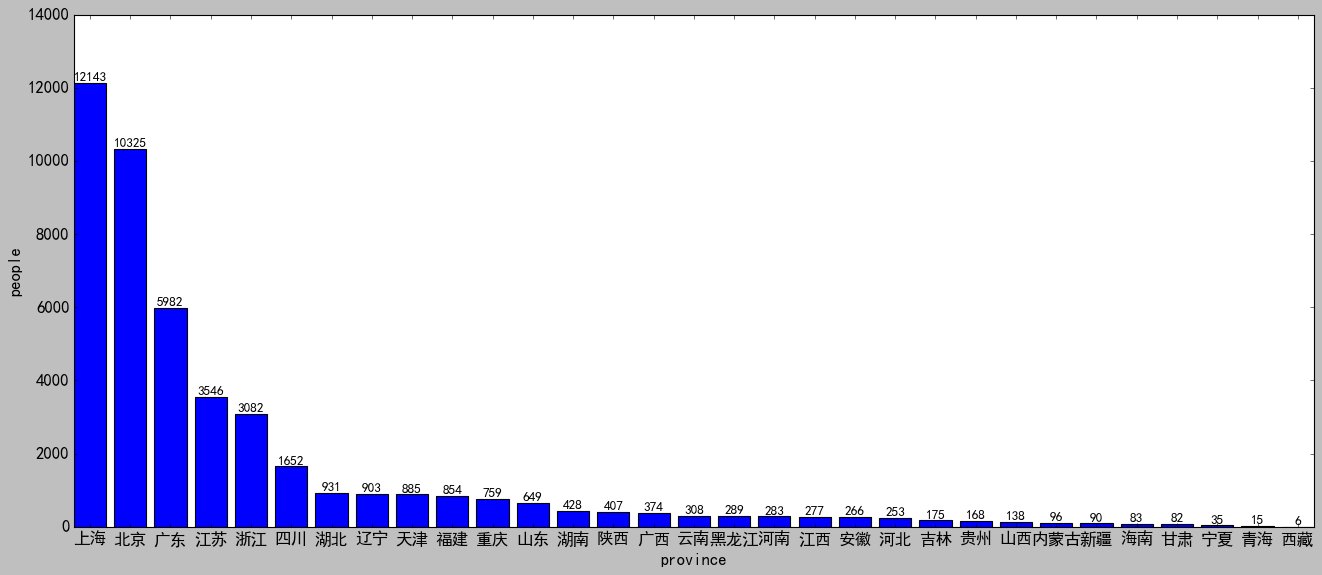

In [73]:
plt.figure(figsize=(20,8))
p = plt.bar(data_province_user.index,data_province_user['userid'],align='center')
plt.xticks(data_province_user.index,fontsize = 15)
plt.yticks(fontsize = 15)
plt.xlabel('province',fontsize =15)
plt.ylabel('people',fontsize =15)
plt.bar_label(p)
plt.show()

## 用户性别分布

In [74]:
gender = data_userProfile['gender'].value_counts()
gender

gender
女    10818
男     8951
Name: count, dtype: int64

In [75]:
#查看缺失率
data_userProfile['gender'].isnull().sum() / data_userProfile['gender'].shape[0]

0.607625587995951

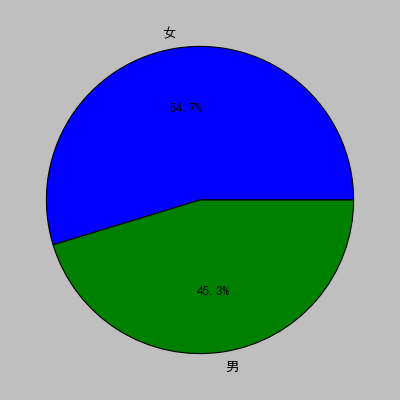

In [76]:
#饼图,男女人数占比
plt.figure(figsize=(12,6))
plt.pie(gender,labels=gender.index,autopct='%1.1f%%')
plt.show()

### 用户性别的信息缺失率高达60%，非缺失的数据中有19769条数据，女性占54.72%，男性占45.28%

## 用户年龄信息分布

In [77]:
age = data_userProfile['age'].value_counts()
age

age
80后    2067
70后    1647
60后    1373
90后     773
00后     101
Name: count, dtype: int64

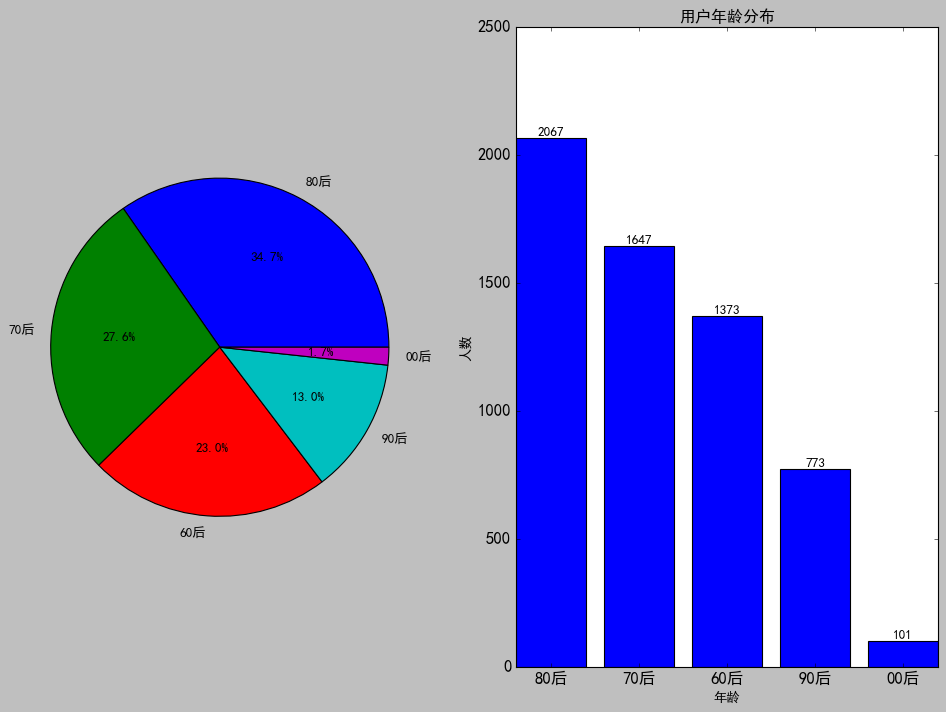

In [78]:
#饼图，年龄段占比
plt.figure(figsize=(15,10))

plt.subplot(121)
plt.pie(age,labels=age.index,autopct='%1.1f%%')

plt.subplot(122)
p = plt.bar(age.index,age.values,align='center' )
plt.xticks(age.index,fontsize = 15)
plt.yticks(fontsize = 15)
plt.xlabel('年龄')
plt.ylabel('人数')
plt.title('用户年龄分布')
plt.bar_label(p)
plt.show()

In [79]:
#缺失率
data_userProfile['age'].isnull().sum() / data_userProfile['age'].shape[0]

0.881686283071671

In [80]:
#不同年龄段区间的性别分布

In [81]:
data_man = data_userProfile[data_userProfile['gender'] == '男']
data_wuman = data_userProfile[data_userProfile['gender'] == '女']

In [82]:
data_man_age = data_man[['gender','age']].groupby('age').agg('count')
data_wuman_age = data_wuman[['gender','age']].groupby('age').agg('count')

In [83]:
data_man_age

,gender
age,
00后,47
60后,705
70后,864
80后,888
90后,295


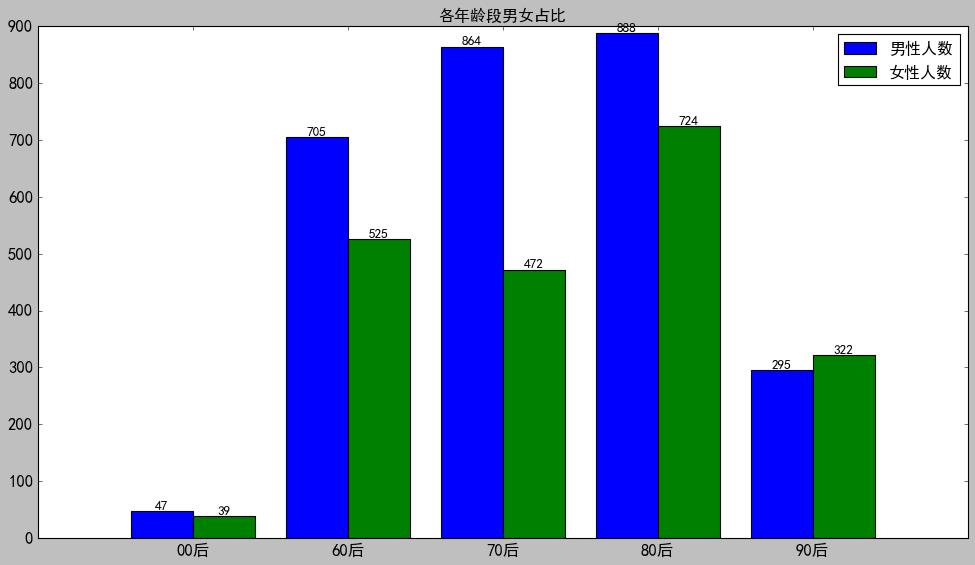

In [84]:
plt.figure(figsize=(15,8))
width = 0.4
width1 = np.arange(len(data_man_age))
p1 = plt.bar(width1-width/2,data_man_age['gender'],align='center',label = '男性人数',width=width)
p2 = plt.bar(width1+width/2,data_wuman_age['gender'],align='center',label = '女性人数',width=width)
plt.xticks(width1,data_man_age.index,fontsize = 15)
plt.yticks(fontsize = 15)
plt.title('各年龄段男女占比')
plt.legend()
plt.bar_label(p1)
plt.bar_label(p2)
plt.show()


### 用户年龄数据缺少88.2%，共5961条非缺失信息。以80后，70后，60后为主，几乎很少00后。整体用户男性少于女性，在已经提供年龄的数据中，男性多于女性。女性更重视对于年龄的保密性。

## 用户浏览行为分析

In [85]:
data_action

,userid,actionType,actionTime
0,100000000013,1,1632067153
1,100000000013,5,1632067163
2,100000000013,6,1632067274
3,100000000013,5,1632067311
4,100000000013,6,1632067336
...,...,...,...
331199,114869967545,5,1662733073
331200,114869967545,3,1662733143
331201,114869967545,5,1662733151
331202,114869967545,6,1662733168


In [86]:
'''
#时间转化1
import time
def time_convert(timestamp):
    str_time = time.strftime("%Y-%m-%d %H:%M:%S", time.localtime(timestamp))
    return str_time
    
#对data_action的actionTime列进行转换
data_action.actionTime = pd.to_datetime(data_action.actionTime.apply(time_convert))
'''
    

'\n#时间转化1\nimport time\ndef time_convert(timestamp):\n    str_time = time.strftime("%Y-%m-%d %H:%M:%S", time.localtime(timestamp))\n    return str_time\n    \n#对data_action的actionTime列进行转换\ndata_action.actionTime = pd.to_datetime(data_action.actionTime.apply(time_convert))\n'

In [87]:
#时间转换2
data_action['actionTime1'] = data_action['actionTime'].apply(lambda x: pd.to_datetime(x, unit='s')) #指示时间戳是以秒为单位的

In [88]:
data_action

,userid,actionType,actionTime,actionTime1
0,100000000013,1,1632067153,2021-09-19 15:59:13
1,100000000013,5,1632067163,2021-09-19 15:59:23
2,100000000013,6,1632067274,2021-09-19 16:01:14
3,100000000013,5,1632067311,2021-09-19 16:01:51
4,100000000013,6,1632067336,2021-09-19 16:02:16
...,...,...,...,...
331199,114869967545,5,1662733073,2022-09-09 14:17:53
331200,114869967545,3,1662733143,2022-09-09 14:19:03
331201,114869967545,5,1662733151,2022-09-09 14:19:11
331202,114869967545,6,1662733168,2022-09-09 14:19:28


#### 使用actionTime1作为下面运行的依据

In [89]:
data_action['year'] = data_action.actionTime1.dt.year #提取年份
data_action['month'] = data_action.actionTime1.dt.month #提取月份
data_action['day'] = data_action.actionTime1.dt.day #提取day
data_action['hour'] = data_action.actionTime1.dt.hour #提取hour
data_action['time'] = data_action.actionTime1.dt.time #提取时分秒
data_action['year_month'] = data_action.actionTime1.dt.strftime('%Y-%m')
data_action['date'] = data_action.actionTime1.dt.date


In [90]:
data_action

,userid,actionType,actionTime,actionTime1,year,month,day,hour,time,year_month,date
0,100000000013,1,1632067153,2021-09-19 15:59:13,2021,9,19,15,15:59:13,2021-09,2021-09-19
1,100000000013,5,1632067163,2021-09-19 15:59:23,2021,9,19,15,15:59:23,2021-09,2021-09-19
2,100000000013,6,1632067274,2021-09-19 16:01:14,2021,9,19,16,16:01:14,2021-09,2021-09-19
3,100000000013,5,1632067311,2021-09-19 16:01:51,2021,9,19,16,16:01:51,2021-09,2021-09-19
4,100000000013,6,1632067336,2021-09-19 16:02:16,2021,9,19,16,16:02:16,2021-09,2021-09-19
...,...,...,...,...,...,...,...,...,...,...,...
331199,114869967545,5,1662733073,2022-09-09 14:17:53,2022,9,9,14,14:17:53,2022-09,2022-09-09
331200,114869967545,3,1662733143,2022-09-09 14:19:03,2022,9,9,14,14:19:03,2022-09,2022-09-09
331201,114869967545,5,1662733151,2022-09-09 14:19:11,2022,9,9,14,14:19:11,2022-09,2022-09-09
331202,114869967545,6,1662733168,2022-09-09 14:19:28,2022,9,9,14,14:19:28,2022-09,2022-09-09


## 用户月访问量(操作量)

In [91]:
data_action.drop_duplicates(['userid','year_month']).groupby('year_month').userid.count() #算每个月的访问量,一个人算一次

year_month
2021-08        2
2021-09     3006
2021-10     7396
2021-11     6184
2021-12     5376
2022-01     5345
2022-02     5144
2022-03    10278
2022-04    16830
2022-05    18126
2022-06    13357
2022-07    10517
2022-08     6581
2022-09     2617
Name: userid, dtype: int64

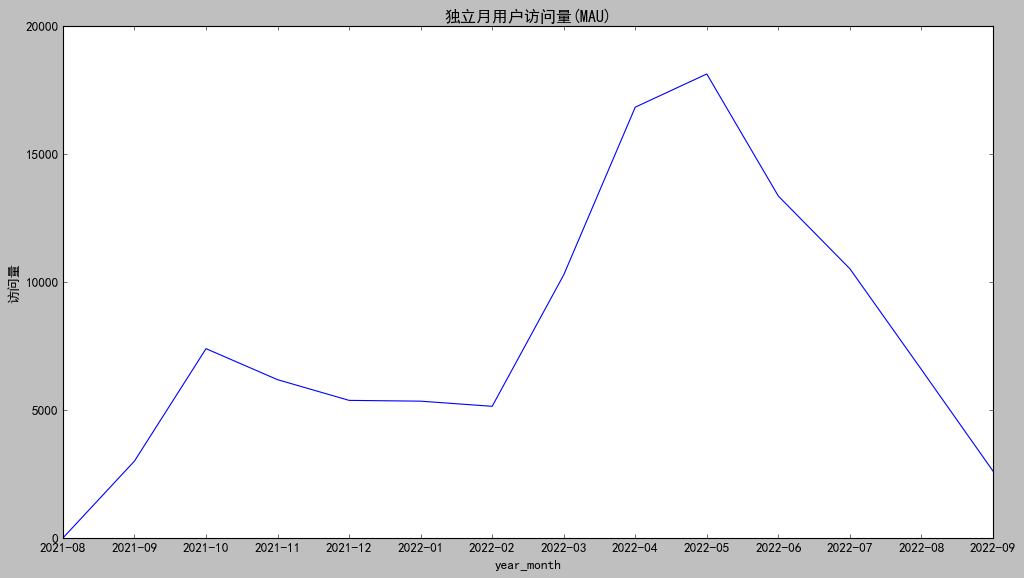

In [92]:
plt.figure(figsize=(15,8))
plt.plot(data_action.drop_duplicates(['userid','year_month']).groupby('year_month').userid.count().index,
         data_action.drop_duplicates(['userid','year_month']).groupby('year_month').userid.count())
#plt.xticks(rotation=90)
plt.xlabel('year_month')
plt.ylabel('访问量')
plt.title('独立月用户访问量(MAU)')
plt.show()

In [93]:
data_action.groupby('year_month').userid.count() #算每个月的访问量,每个人的总访问量，每次点击都算一次访问

year_month
2021-08         2
2021-09     28207
2021-10    103114
2021-11     54462
2021-12     57574
2022-01     60503
2022-02     54061
2022-03    117107
2022-04    284715
2022-05    317133
2022-06    255443
2022-07    191538
2022-08    114190
2022-09     28011
Name: userid, dtype: int64

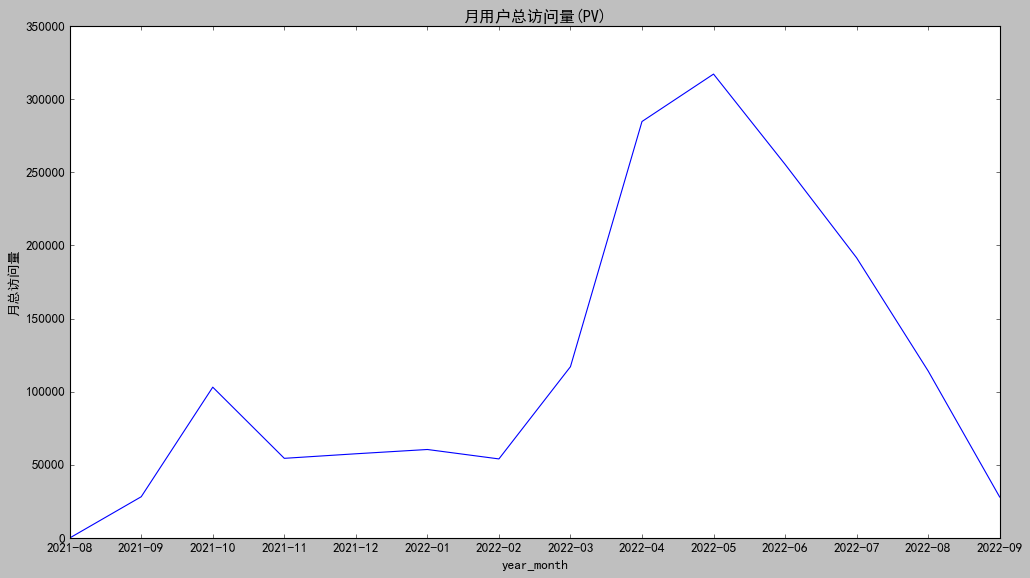

In [94]:
plt.figure(figsize=(15,8))
plt.plot(
    data_action.groupby('year_month').userid.count() .index,
    data_action.groupby('year_month').userid.count() )
#plt.xticks(rotation=90)
plt.xlabel('year_month')
plt.ylabel('月总访问量')
plt.title('月用户总访问量(PV)')
plt.show()

### MAU用月内产生用户行为的独立userid数量表示，PV用唤醒app(行为类型1)次数表示用户活跃的两个峰值分别在四五月和十月，小长假是人们出国/出境旅游的首选时间。

## 用户日访问量

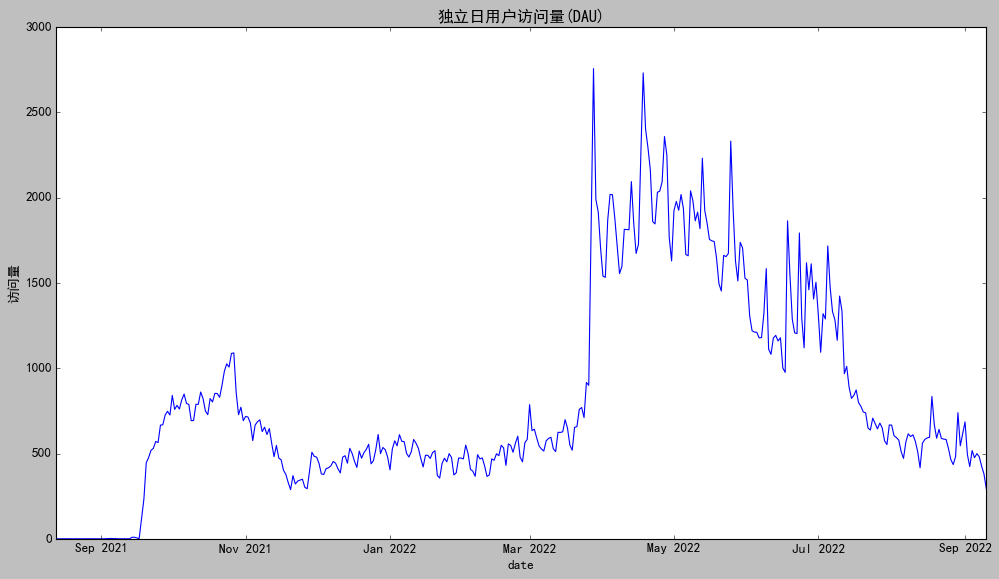

In [95]:
plt.figure(figsize=(15,8))
plt.plot(
    data_action.drop_duplicates(['userid','date']).groupby('date').userid.count().index,
    data_action.drop_duplicates(['userid','date']).groupby('date').userid.count())
#plt.xticks(rotation=90)
plt.xlabel('date')
plt.ylabel('访问量')
plt.title('独立日用户访问量(DAU)')
plt.show()

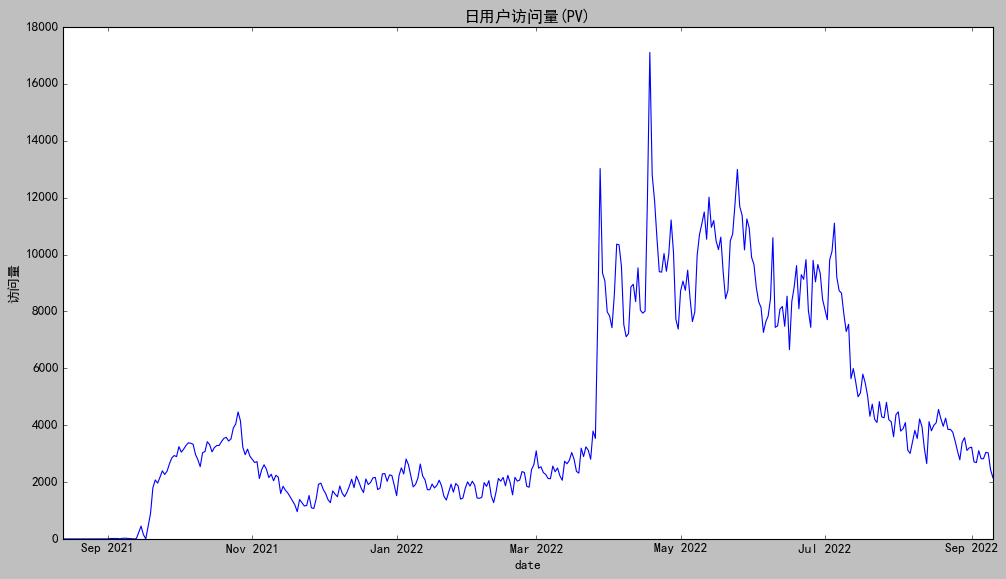

In [96]:
plt.figure(figsize=(15,8))
plt.plot(
    data_action.groupby('date').userid.count().index,
    data_action.groupby('date').userid.count())
#plt.xticks(rotation=90)
plt.xlabel('date')
plt.ylabel('访问量')
plt.title('日用户访问量(PV)')
plt.show()

### DAU为每日产生用户行为的独立userid数，PV为每日行为类型为1的行为数量
### DAU的峰值出现在4月初，但同一时段的PV却相对PV峰值五月初较低，说明4月初平均用户唤醒次数较低，可能是有新活动吸引新用户
### 2021年12月之前用户的PV和DAU有一个小峰值，之后较为平稳，APP进入健康平稳期。

## 小时访问分析

In [97]:
data_action

,userid,actionType,actionTime,actionTime1,year,month,day,hour,time,year_month,date
0,100000000013,1,1632067153,2021-09-19 15:59:13,2021,9,19,15,15:59:13,2021-09,2021-09-19
1,100000000013,5,1632067163,2021-09-19 15:59:23,2021,9,19,15,15:59:23,2021-09,2021-09-19
2,100000000013,6,1632067274,2021-09-19 16:01:14,2021,9,19,16,16:01:14,2021-09,2021-09-19
3,100000000013,5,1632067311,2021-09-19 16:01:51,2021,9,19,16,16:01:51,2021-09,2021-09-19
4,100000000013,6,1632067336,2021-09-19 16:02:16,2021,9,19,16,16:02:16,2021-09,2021-09-19
...,...,...,...,...,...,...,...,...,...,...,...
331199,114869967545,5,1662733073,2022-09-09 14:17:53,2022,9,9,14,14:17:53,2022-09,2022-09-09
331200,114869967545,3,1662733143,2022-09-09 14:19:03,2022,9,9,14,14:19:03,2022-09,2022-09-09
331201,114869967545,5,1662733151,2022-09-09 14:19:11,2022,9,9,14,14:19:11,2022-09,2022-09-09
331202,114869967545,6,1662733168,2022-09-09 14:19:28,2022,9,9,14,14:19:28,2022-09,2022-09-09


In [98]:
data_action.drop_duplicates(['userid']).groupby('hour').userid.count() #每个时段的独立用户访问量,一个时段一人只统计一次

hour
0     1620
1      883
2      536
3      360
4      325
5      400
6      685
7     1274
8     1895
9     2970
10    3199
11    2884
12    2585
13    2878
14    2848
15    2858
16    2836
17    2695
18    2395
19    2521
20    2746
21    2995
22    3277
23    2718
Name: userid, dtype: int64

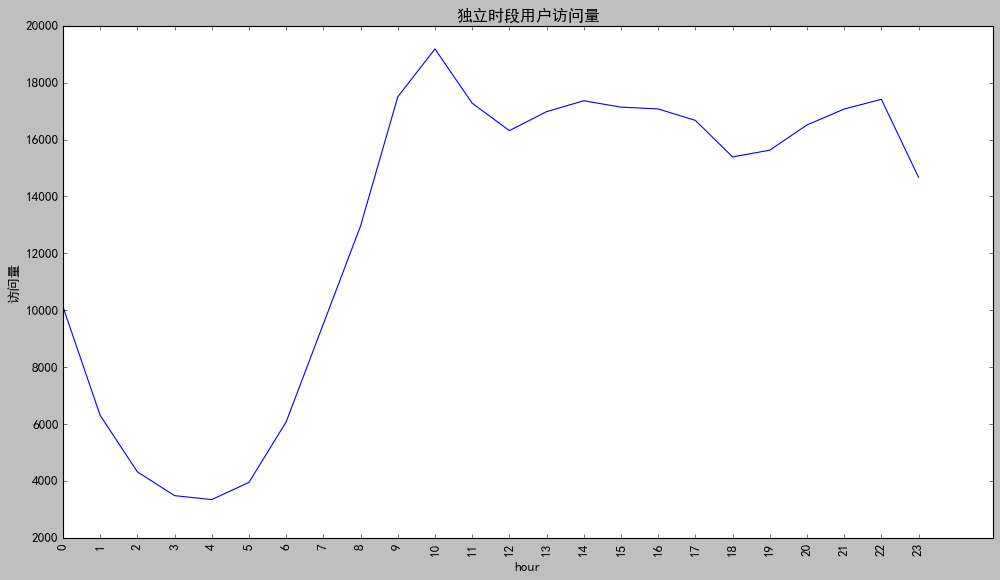

In [99]:
plt.figure(figsize=(15,8))
plt.plot(
    data_action.drop_duplicates(['userid','hour']).groupby('hour').userid.count().index,
    data_action.drop_duplicates(['userid','hour']).groupby('hour').userid.count())
plt.xticks(data_action.drop_duplicates(['userid','hour']).groupby('hour').userid.count().index,rotation=90)
plt.xlabel('hour')
plt.ylabel('访问量')
plt.title('独立时段用户访问量')
plt.show()

In [100]:
data_action.groupby('hour').userid.count() #每个时段的用户访问量,统计一人一个时段的所有访问次数

hour
0      54017
1      30444
2      19483
3      15103
4      13415
5      15448
6      24849
7      39708
8      57732
9     106596
10    120137
11     92997
12     80715
13     92634
14     99512
15     95778
16     95571
17     89919
18     77941
19     79064
20     88046
21     94753
22     99510
23     82688
Name: userid, dtype: int64

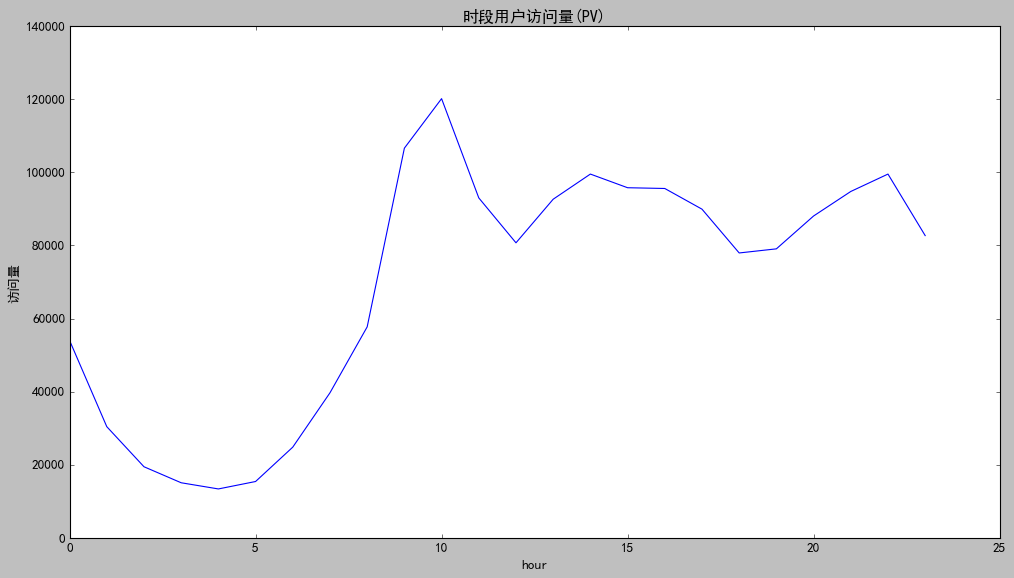

In [101]:
plt.figure(figsize=(15,8))
plt.plot(
    data_action.groupby('hour').userid.count().index,
    data_action.groupby('hour').userid.count())
#plt.xticks(rotation=90)
plt.xlabel('hour')
plt.ylabel('访问量')
plt.title('时段用户访问量(PV)')
plt.show()

### 上午9-10点为用户的访问高峰期，之后稍有下降

## 操作时间、操作次数分析

In [102]:
# 浏览操作的时间分析
action_counts = data_action[['userid','date','actionType']].groupby(['userid','date'])['actionType'].count()  #每个用户每天的操作次数

In [103]:
action_counts

userid        date      
100000000013  2021-09-19    10
              2021-09-21     1
              2021-09-22     2
              2021-09-23     1
              2021-09-28     1
                            ..
114999582132  2022-08-26     3
              2022-08-29     5
              2022-08-30     4
114999782736  2021-12-23     4
              2021-12-24     4
Name: actionType, Length: 323874, dtype: int64

In [104]:
#各种操作次数的统计,如操作1次的有93854条
action_counts.value_counts()

actionType
1      93854
2      45695
3      39905
4      30005
5      22410
       ...  
144        1
162        1
173        1
200        1
111        1
Name: count, Length: 187, dtype: int64

In [105]:
action_result = action_counts.value_counts()[:30][::-1]  #[:30][::-1]表示取前30个且按照30-1降序排序

In [106]:
action_result

actionType
30      353
29      361
28      389
27      457
26      483
25      573
24      636
23      738
22      922
21      956
20     1147
19     1296
18     1464
17     1750
16     2048
15     2405
14     2957
13     3637
12     4464
11     5438
10     6731
9      8380
8     10327
7     13375
6     16928
5     22410
4     30005
3     39905
2     45695
1     93854
Name: count, dtype: int64

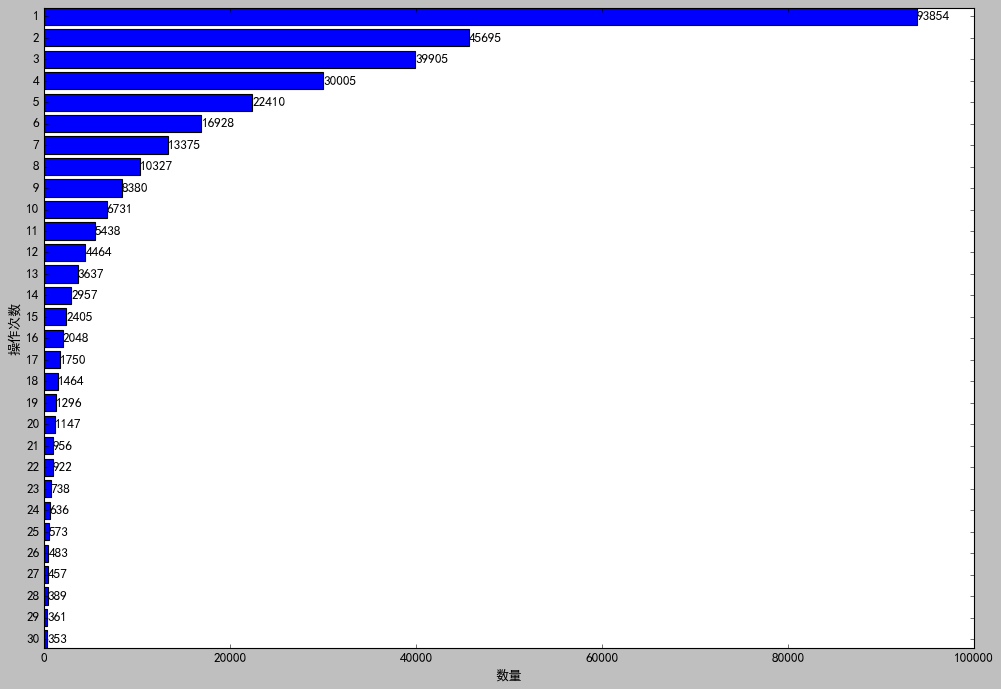

In [107]:
#barh画横向的bar
plt.figure(figsize=(15,10))
p = plt.barh(y = action_result.index.astype(str),width = action_result) #.astype(str)可以让图倒着画
plt.xlabel('数量')
plt.ylabel('操作次数')
plt.bar_label(p)
plt.show()

In [108]:
#操作时间差
#按照用户和时间排序
#计算每个用户（userid）在每一天（date）内连续动作的时间差
df_sorted = data_action.sort_values(['userid','actionTime1'])

In [109]:
def calculate_time_dif(group):
    time_dif = group['actionTime1'].diff() #按时间列将上下两个时间做差值
    return time_dif.dropna().dt.seconds #去掉空值，取秒数

In [110]:
#计算操作时间的时间差
time_result = df_sorted.groupby(['userid','date']).apply(calculate_time_dif)

C:\Users\C\AppData\Local\Temp\ipykernel_20500\1840129151.py:2: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  time_result = df_sorted.groupby(['userid','date']).apply(calculate_time_dif)


In [111]:
time_result
#如显示，100000000013,2021-09-19,1,10
#表示该用户，在9-19号，第二个动作与第一个动作之间的时间差是10秒，第三个动作与第二个动作之间的时间差是111秒

userid        date               
100000000013  2021-09-19  1           10
                          2          111
                          3           37
                          4           25
                          5            5
                                    ... 
114999782736  2021-12-23  1334850     37
                          1334851    205
              2021-12-24  1334853      7
                          1334854     80
                          1334855    338
Name: actionTime1, Length: 1342186, dtype: int32

In [112]:
time_result.value_counts().sort_index() #每个人的第几次操作时间差的次数总数

actionTime1
1        17023
2        31575
3        30510
4        29004
5        29569
         ...  
85640        1
85674        1
85902        1
86069        1
86268        1
Name: count, Length: 43838, dtype: int64

In [113]:
time_counts = time_result.value_counts()[:30]
time_counts

actionTime1
2     31575
3     30510
6     30465
5     29569
7     29559
4     29004
8     27623
9     25631
10    24565
11    22837
12    21330
13    20014
14    18941
15    17638
1     17023
16    16573
17    16092
18    14941
19    14303
20    13499
21    12940
22    12608
23    11838
24    11326
25    10929
26    10474
27    10382
28     9956
29     9446
30     9179
Name: count, dtype: int64

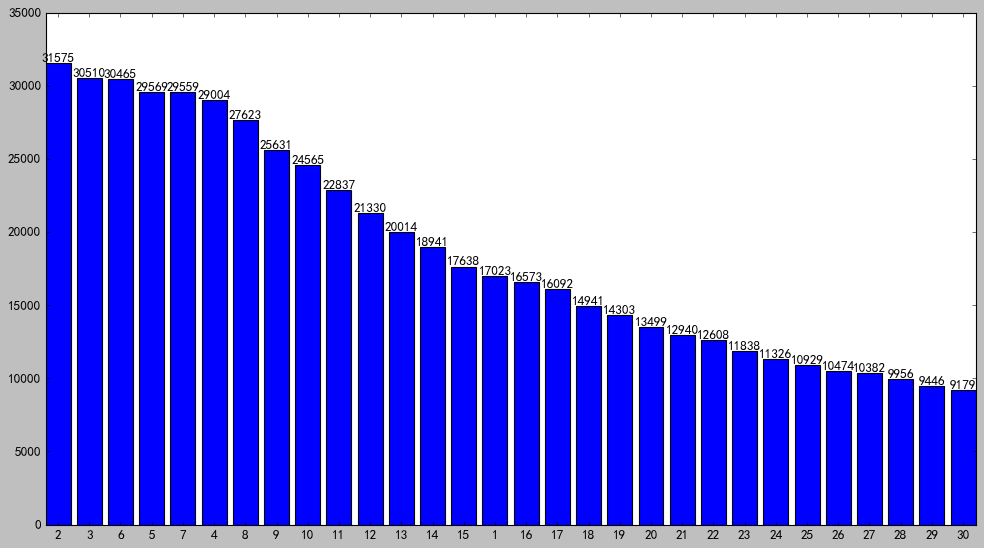

In [114]:
plt.figure(figsize=(15,8))
p = plt.bar(x = time_counts.index.astype(str),height = time_counts)
plt.bar_label(p)
plt.show()

In [115]:
#以分钟数作为x轴
time_counts_1 = (time_result/60 +1).astype(int).value_counts()[:30]
time_counts_1

actionTime1
1     744581
2     172162
3      78598
4      43879
5      28446
6      19774
7      14525
8      11343
9       9111
10      7802
11      6707
12      5783
13      5048
14      4446
15      4048
16      3555
17      3254
18      3055
19      2806
20      2610
21      2507
22      2326
23      2211
24      2007
25      1946
26      1889
27      1844
29      1674
28      1671
30      1585
Name: count, dtype: int64

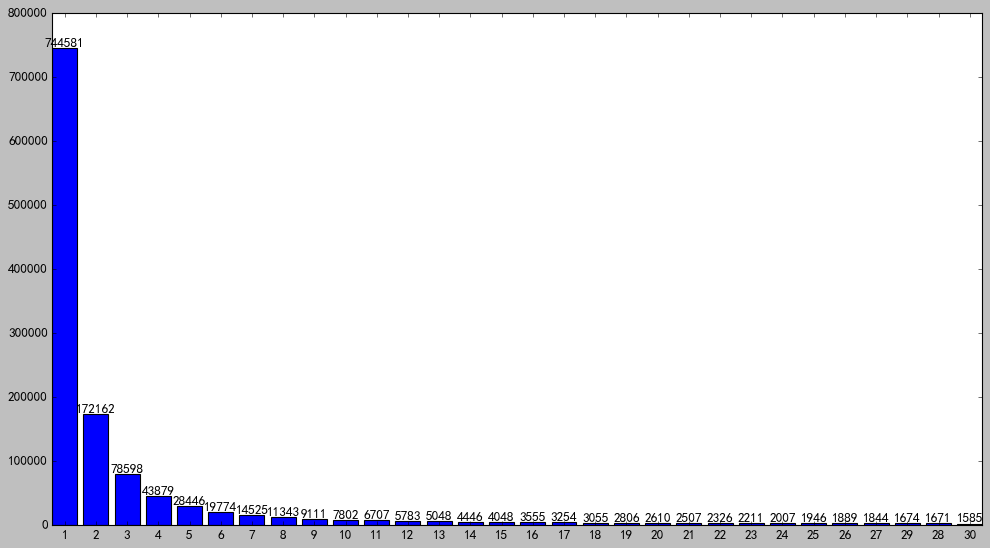

In [116]:
plt.figure(figsize=(15,8))
p = plt.bar(x = time_counts_1.index.astype(str),height = time_counts_1)
plt.bar_label(p)
plt.show()

#### 大多数用户的操作时间都在1分钟之内，结合操作次数发现，大部分用户只有1次操作，大部分都为打开app。
#### 若排除数据缺失的情况，操作类型不连续，即有不少数据是从1跳到5678.

## APP转化分析

In [117]:
def vis_type(x):
    if x in [2,3,4]: # 对于访问类型分类，把2-4统一为2
        return 2
    else:
        return x


In [118]:
data_action['visitor_type'] = data_action['actionType'].apply(vis_type)
df = data_action.groupby('visitor_type',as_index=False).userid.count()

In [119]:
df

,visitor_type,userid
0,1,479374
1,2,209297
2,5,599224
3,6,284216
4,7,35036
5,8,35867
6,9,23046


In [120]:
from pyecharts import options as opts
from pyecharts.charts import Funnel
df = data_action.groupby('visitor_type',as_index=False).userid.count()
df['userid'] = (df['userid']/df['userid'][0])*100 # 其他操作类型的数量 与 操作类型1数量 的比率
df = df.values.tolist()

In [121]:
df

[[1.0, 100.0],
 [2.0, 43.66048221221843],
 [5.0, 125.00135593503194],
 [6.0, 59.288989390329895],
 [7.0, 7.308698427532574],
 [8.0, 7.482049506231044],
 [9.0, 4.807519807081736]]

In [122]:
c = (
    Funnel()
    .add("访问量", df,
         label_opts=opts.LabelOpts(position="inside"), #设置标签的位置在内部
         sort_='none', #设置漏斗图不进行排序
         tooltip_opts=opts.TooltipOpts(trigger="item",
                                       formatter="{a} <br/>{b} : {c}%"),#设置提示框
         )
    .set_global_opts(title_opts=opts.TitleOpts(title="访问转化"))

)

c.render_notebook()

In [123]:
from pyecharts import options as opts
from pyecharts.charts import Funnel
df = data_action.groupby('visitor_type',as_index=False).userid.count()
df['userid'] = (df['userid']/df['userid'].shift(1))*100 # 往下除一个，计算1-2.2-3的转化率
df['visitor_type'] = ['1', '1-2', '2-5', '5-6', '6-7', '7-8', '8-9']
df = df.values.tolist()


c = (
    Funnel()
    .add("访问量", df,
         label_opts=opts.LabelOpts(position="inside"),
         sort_='none',
         tooltip_opts=opts.TooltipOpts(trigger="item", formatter="{a} <br/>{b} : {c}%"),
         )
    .set_global_opts(title_opts=opts.TitleOpts(title="访问转化"))

)

c.render_notebook()

#### 整体用户来说，从打开APP到购买转化的转化率只有4.8%，非常低。

- 首先是1唤醒APP到2浏览页面的转化率43%，使用APP浏览产品的用很少。
- 浏览商品2到操作5的转化率为286%，并且操作5的次数比启动APP的次数还要多，看起来有些异常，如果排除数据异常的原因，可能是由于很多用户是从其他渠道直接进入了操作5（填写表单）的流程。所以，为了提高用户使用APP的频率，公司应该采取一些推广宣传措施，鼓励用户在APP中浏览商品、购买服务等操作。
- 操作6到操作7转化率只有12.3%，由于提交表单之后会有具体沟通的环节，也许是经过了沟通之后，双方并没有达成一致意见，无法形成订单。因此保证产品宣传与实际情况一致，以及加强克服沟通都是急需提升的。
- 操作7-操作8的转化率高于100%，说明操作7的数据有一定的缺失 或者 操作8的数据异常
- 操作8到操作9的转化率64.2%

# 订单数据分析 data_orderHistory
## 用户VIP套餐购买转化分析

In [124]:
data_orderHistory['orderType'].value_counts() #1为购买vip

orderType
0    21811
1     3901
Name: count, dtype: int64

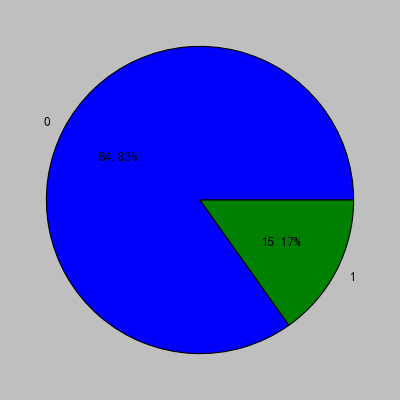

In [125]:
plt.pie(data_orderHistory['orderType'].value_counts(), labels=data_orderHistory['orderType'].value_counts().index, autopct='%1.2f%%')
plt.show()

#### 整体的VIP套餐中，只有15%的用户购买vip

## 用户复购分析

In [126]:
data_orderHistory

,userid,orderid,orderTime,orderType,city,country,continent
0,100000000013,1000015,1639480916,0,柏林,德国,欧洲
1,100000000013,1000014,1659726043,0,旧金山,美国,北美洲
2,100000000393,1000033,1657206696,0,巴黎,法国,欧洲
3,100000000459,1000036,1638368068,0,纽约,美国,北美洲
4,100000000459,1000034,1636913123,0,巴厘岛,印度尼西亚,亚洲
...,...,...,...,...,...,...,...
5054,114865667242,1104548,1657898564,0,吉隆坡,马来西亚,亚洲
5055,114865869149,1104568,1658621541,0,京都,日本,亚洲
5056,114868867745,1104613,1661789535,0,台北,中国台湾,亚洲
5057,114869069841,1104633,1662286310,1,香港,中国香港,亚洲


In [127]:
# 计算用户购买订单数
order_number = data_orderHistory.groupby(['userid'],as_index=False).orderid.count()
order_number

,userid,orderid
0,100000000013,2
1,100000000371,1
2,100000000393,1
3,100000000459,2
4,100000000637,1
...,...,...
13318,114869467148,1
13319,114869652742,1
13320,114869867143,1
13321,114869969842,1


In [128]:
# 按订单数统计人数，即复购12345次的人数
order_number = order_number.groupby('orderid',as_index=False).userid.count()
order_number.rename(columns={'orderid':'order_quantity','userid':'count'}, inplace=True)
order_number

,order_quantity,count
0,1,7992
1,2,2638
2,3,1244
3,4,566
4,5,349
5,6,181
6,7,113
7,8,64
8,9,47
9,10,34


In [129]:
# 超过8次的，计算为8次以上的
order_number8 = pd.DataFrame([{'order_quantity':'8次以上', 'count':order_number[8:].count().sum()}])
order_number8

,order_quantity,count
0,8次以上,46


In [130]:
order_number = pd.concat([order_number[:8],order_number8])
order_number

,order_quantity,count
0,1,7992
1,2,2638
2,3,1244
3,4,566
4,5,349
5,6,181
6,7,113
7,8,64
0,8次以上,46


In [131]:
from pyecharts.charts import Page, Pie

c = (
    Pie()
    .add('',order_number.values.tolist())
    .set_global_opts(title_opts=opts.TitleOpts(title="所有服务用户复购"),
                     legend_opts=opts.LegendOpts(is_show=False))
    .set_series_opts(label_opts=opts.LabelOpts(formatter="{b}: {c} ({d}%)"))
)

c.render_notebook()

In [132]:
# 计算购买过VIP套餐用户复购率
order_number = data_orderHistory[data_orderHistory.orderType==1].groupby(['userid'],as_index=False).orderid.count()
order_number = order_number.groupby('orderid',as_index=False).userid.count()
order_number.rename(columns={'orderid':'order_quantity','userid':'count'}, inplace=True)
order_number8 = pd.DataFrame([{'order_quantity':'8次以上','count':order_number[8:].count().sum()}])
order_number = pd.concat([order_number[:8],order_number8])

from pyecharts.charts import Page, Pie

c = (
    Pie()
    .add('',order_number.values.tolist())
    .set_global_opts(title_opts=opts.TitleOpts(title="VIP服务用户复购图"),
                    legend_opts=opts.LegendOpts(is_show=False))
    .set_series_opts(label_opts=opts.LabelOpts(formatter="{b}: {c}({d}%)"))
)

c.render_notebook()

## 出游目的地分析

In [133]:
data_orderHistory['orderTime'] #订单时间，这里是时间戳

0       1639480916
1       1659726043
2       1657206696
3       1638368068
4       1636913123
           ...    
5054    1657898564
5055    1658621541
5056    1661789535
5057    1662286310
5058    1662285791
Name: orderTime, Length: 25712, dtype: int64

In [134]:
data_orderHistory['orderTime'] = data_orderHistory['orderTime'].apply(lambda x:pd.to_datetime(x,unit='s'))

In [135]:
data_orderHistory['orderTime']

0      2021-12-14 11:21:56
1      2022-08-05 19:00:43
2      2022-07-07 15:11:36
3      2021-12-01 14:14:28
4      2021-11-14 18:05:23
               ...        
5054   2022-07-15 15:22:44
5055   2022-07-24 00:12:21
5056   2022-08-29 16:12:15
5057   2022-09-04 10:11:50
5058   2022-09-04 10:03:11
Name: orderTime, Length: 25712, dtype: datetime64[ns]

In [136]:
#提取出年月日时分秒
data_orderHistory['year'] = data_orderHistory.orderTime.dt.year
data_orderHistory['month'] = data_orderHistory.orderTime.dt.month
data_orderHistory['day'] = data_orderHistory.orderTime.dt.day
data_orderHistory['date'] = data_orderHistory.orderTime.dt.date
data_orderHistory['time'] = data_orderHistory.orderTime.dt.time
data_orderHistory['hour'] = data_orderHistory.orderTime.dt.hour
data_orderHistory['year_month']= data_orderHistory.orderTime.dt.strftime('%Y-%m')

### VIP和非VIP的目的地分析

In [137]:
#vip称ivip中，最受欢迎的10个城市
city_vip =  data_orderHistory[data_orderHistory['orderType']== 1]['city']. value_counts() [:10]
city_non_vip =  data_orderHistory[data_orderHistory['orderType']== 0]['city']. value_counts() [:10]

In [138]:
city_vip

city
东京     445
大阪     248
曼谷     163
台北     158
巴厘岛    150
墨尔本    147
京都     147
悉尼     133
吉隆坡    131
巴黎     130
Name: count, dtype: int64

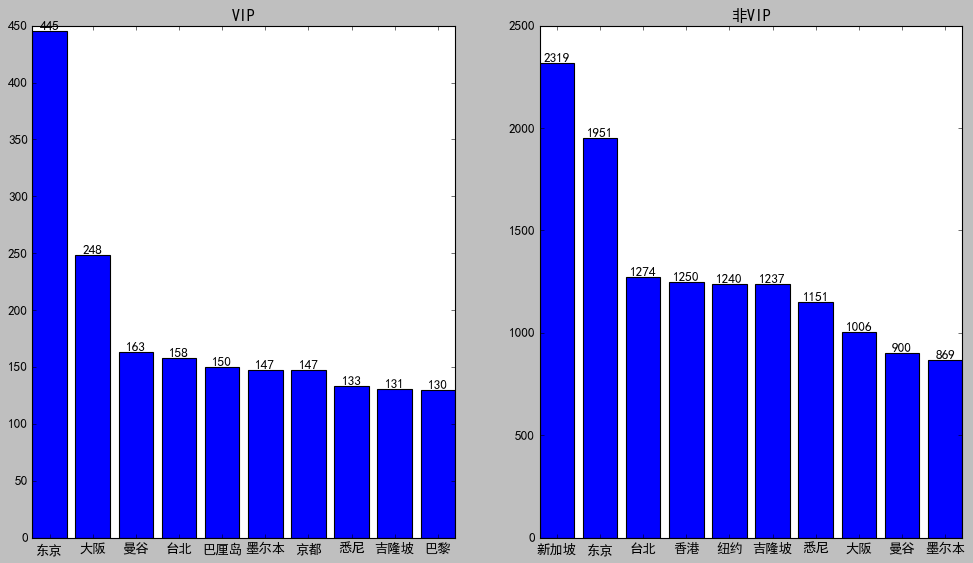

In [139]:
plt.figure(figsize=(15,8))
plt.subplot(121)
p1 = plt.bar(x=city_vip.index, height = city_vip)
plt.bar_label(p1)
plt.title('VIP')

plt.subplot(122)
p2 = plt.bar(x=city_non_vip.index, height = city_non_vip)
plt.bar_label(p2)
plt.title('非VIP')
plt.show()

In [140]:
#vip称ivip中，最受欢迎的6个大洲
continent_vip =  data_orderHistory[data_orderHistory['orderType']== 1]['continent']. value_counts() [:6]
continent_non_vip =  data_orderHistory[data_orderHistory['orderType']== 0]['continent']. value_counts() [:6]

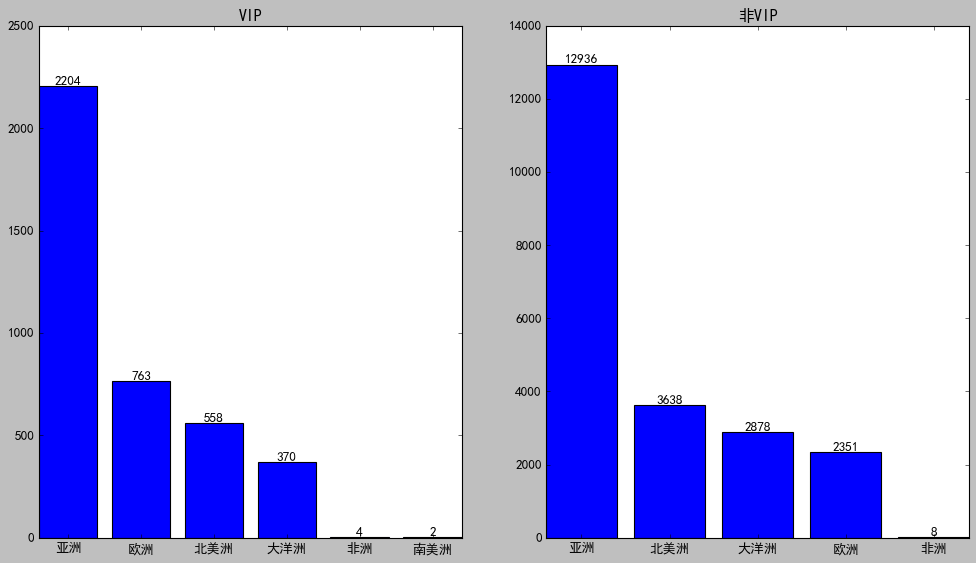

In [141]:
plt.figure(figsize=(15,8))
plt.subplot(121)
p1 = plt.bar(x=continent_vip.index, height = continent_vip)
plt.bar_label(p1)
plt.title('VIP')

plt.subplot(122)
p2 = plt.bar(x=continent_non_vip.index, height = continent_non_vip)
plt.bar_label(p2)
plt.title('非VIP')
plt.show()

In [142]:
#vip称ivip中，最受欢迎的10个国家
country_vip = data_orderHistory[data_orderHistory['orderType'] == 1]['country'].value_counts()[:10]
country_non_vip = data_orderHistory[data_orderHistory['orderType'] == 0]['country'].value_counts()[:10]

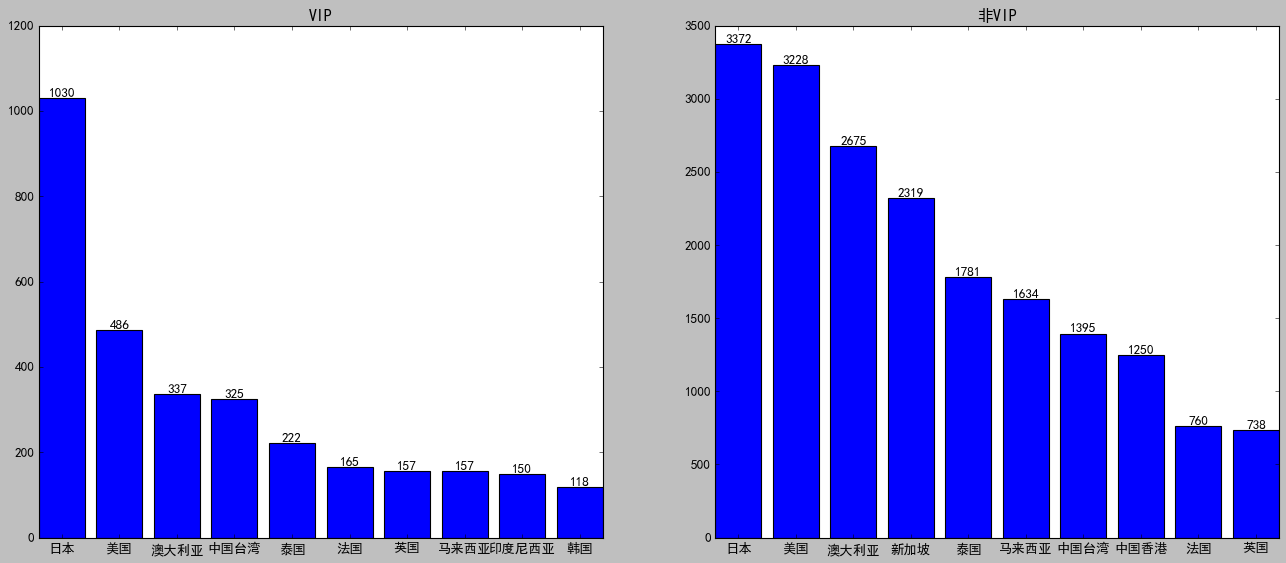

In [143]:
plt.figure(figsize=(20, 8))
plt.subplot(121)
p1 = plt.bar(x=country_vip.index, height=country_vip)
plt.bar_label(p1)
plt.title('VIP')

plt.subplot(122)
p2 = plt.bar(x=country_non_vip.index, height=country_non_vip)
plt.bar_label(p2)
plt.title('非VIP')
plt.show()

In [144]:
data_orderHistory

,userid,orderid,orderTime,orderType,city,country,continent,year,month,day,date,time,hour,year_month
0,100000000013,1000015,2021-12-14 11:21:56,0,柏林,德国,欧洲,2021,12,14,2021-12-14,11:21:56,11,2021-12
1,100000000013,1000014,2022-08-05 19:00:43,0,旧金山,美国,北美洲,2022,8,5,2022-08-05,19:00:43,19,2022-08
2,100000000393,1000033,2022-07-07 15:11:36,0,巴黎,法国,欧洲,2022,7,7,2022-07-07,15:11:36,15,2022-07
3,100000000459,1000036,2021-12-01 14:14:28,0,纽约,美国,北美洲,2021,12,1,2021-12-01,14:14:28,14,2021-12
4,100000000459,1000034,2021-11-14 18:05:23,0,巴厘岛,印度尼西亚,亚洲,2021,11,14,2021-11-14,18:05:23,18,2021-11
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5054,114865667242,1104548,2022-07-15 15:22:44,0,吉隆坡,马来西亚,亚洲,2022,7,15,2022-07-15,15:22:44,15,2022-07
5055,114865869149,1104568,2022-07-24 00:12:21,0,京都,日本,亚洲,2022,7,24,2022-07-24,00:12:21,0,2022-07
5056,114868867745,1104613,2022-08-29 16:12:15,0,台北,中国台湾,亚洲,2022,8,29,2022-08-29,16:12:15,16,2022-08
5057,114869069841,1104633,2022-09-04 10:11:50,1,香港,中国香港,亚洲,2022,9,4,2022-09-04,10:11:50,10,2022-09


## 订单评价数据分析 data_userComment

In [145]:
data_userComment

,userid,orderid,rating,tags,commentsKeyWords
0,100000000013,1000015,4.0,NaN,"['很','简陋','太','随便']"
1,100000000231,1000024,5.0,提前联系|耐心等候,"['很','细心']"
2,100000000471,1000038,5.0,NaN,NaN
3,100000000637,1000040,5.0,主动热情|提前联系|举牌迎接|主动搬运行李,NaN
4,100000000755,1000045,1.0,未举牌服务,NaN
...,...,...,...,...,...
2469,114862069841,1104366,5.0,主动热情|提前联系|举牌迎接|耐心等候,NaN
2470,114865567949,1104542,5.0,主动热情|文明礼貌|驾驶平稳|普通话流利|仪表整洁|干净整洁|车辆物资齐全|提前联系|主动搬...,"['很','干净','整洁','顺畅']"
2471,114865667242,1104548,5.0,NaN,"['还','不错']"
2472,114865869149,1104568,5.0,提前联系|耐心等候,"['很','非常','非常','开心']"


## 订单评分分析

In [146]:
data_userComment.describe()  #查看评分最大最小,平均分

,userid,orderid,rating
count,1.233700e+04,1.233700e+04,12337.000000
mean,1.118720e+11,1.052508e+06,4.916673
std,1.996331e+09,3.005630e+04,0.473990
min,1.000000e+11,1.000015e+06,1.000000
25%,1.108762e+11,1.026300e+06,5.000000
50%,1.114484e+11,1.051799e+06,5.000000
75%,1.126273e+11,1.078680e+06,5.000000
max,1.149995e+11,1.104673e+06,5.000000


In [147]:
#拼接data_userComment,data_orderHistory
#数据合并，添加曾经是否购买过vip的标签
data_userComment_1 = pd.merge(data_userComment,data_orderHistory,how='left',on='userid')  #how='left'左连接,on='userid'以userid拼接

In [148]:
data_userComment_1

,userid,orderid_x,rating,tags,commentsKeyWords,orderid_y,orderTime,orderType,city,country,continent,year,month,day,date,time,hour,year_month
0,100000000013,1000015,4.0,NaN,"['很','简陋','太','随便']",1000015.0,2021-12-14 11:21:56,0.0,柏林,德国,欧洲,2021.0,12.0,14.0,2021-12-14,11:21:56,11.0,2021-12
1,100000000013,1000015,4.0,NaN,"['很','简陋','太','随便']",1000014.0,2022-08-05 19:00:43,0.0,旧金山,美国,北美洲,2022.0,8.0,5.0,2022-08-05,19:00:43,19.0,2022-08
2,100000000231,1000024,5.0,提前联系|耐心等候,"['很','细心']",NaN,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,100000000471,1000038,5.0,NaN,NaN,NaN,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,100000000637,1000040,5.0,主动热情|提前联系|举牌迎接|主动搬运行李,NaN,1000040.0,2022-02-10 15:14:52,0.0,巴塞罗那,西班牙,欧洲,2022.0,2.0,10.0,2022-02-10,15:14:52,15.0,2022-02
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21675,114862069841,1104366,5.0,主动热情|提前联系|举牌迎接|耐心等候,NaN,1104366.0,2022-08-16 08:30:15,0.0,巴塞罗那,西班牙,欧洲,2022.0,8.0,16.0,2022-08-16,08:30:15,8.0,2022-08
21676,114865567949,1104542,5.0,主动热情|文明礼貌|驾驶平稳|普通话流利|仪表整洁|干净整洁|车辆物资齐全|提前联系|主动搬...,"['很','干净','整洁','顺畅']",1104542.0,2022-08-01 18:15:12,0.0,巴黎,法国,欧洲,2022.0,8.0,1.0,2022-08-01,18:15:12,18.0,2022-08
21677,114865667242,1104548,5.0,NaN,"['还','不错']",1104548.0,2022-07-15 15:22:44,0.0,吉隆坡,马来西亚,亚洲,2022.0,7.0,15.0,2022-07-15,15:22:44,15.0,2022-07
21678,114865869149,1104568,5.0,提前联系|耐心等候,"['很','非常','非常','开心']",1104568.0,2022-07-24 00:12:21,0.0,京都,日本,亚洲,2022.0,7.0,24.0,2022-07-24,00:12:21,0.0,2022-07


In [149]:
#在vip和非vip中的评分分布
rating_top10_vip = data_userComment_1[data_userComment_1['orderType'] == 1]['rating'].value_counts()
rating_top10_non_vip = data_userComment_1[data_userComment_1['orderType'] == 0]['rating'].value_counts()

In [150]:
rating_top10_vip

rating
5.0    2418
4.0      48
1.0      42
3.0      30
2.0       9
Name: count, dtype: int64

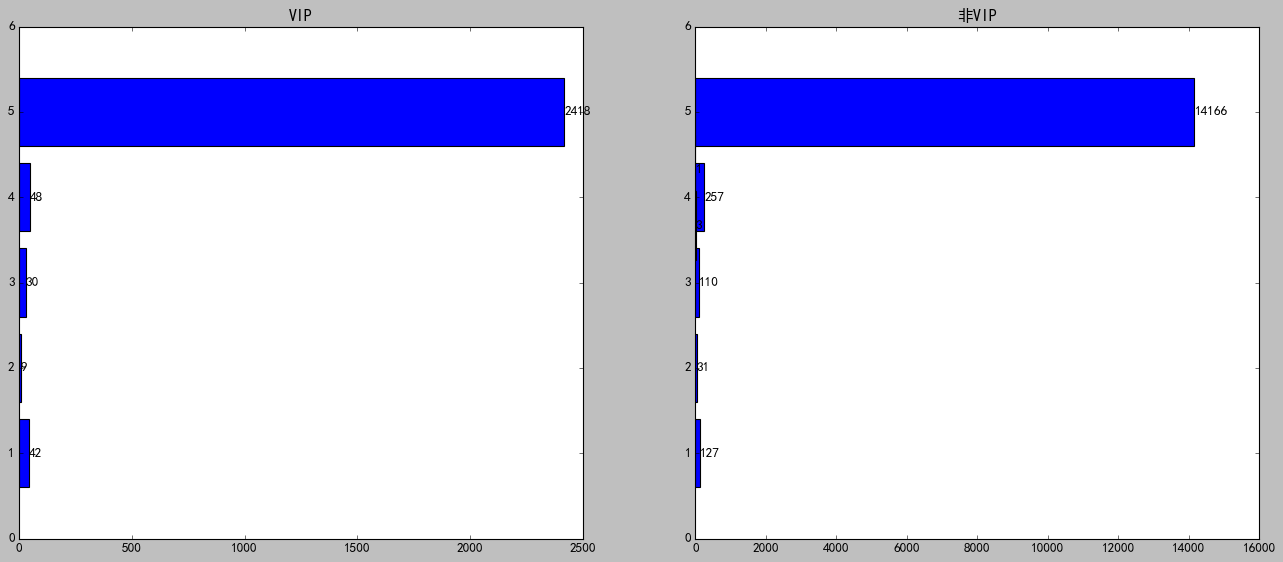

In [151]:
plt.figure(figsize=(20, 8))
plt.subplot(121)
p1 = plt.barh(y = rating_top10_vip.index, width = rating_top10_vip)
plt.bar_label(p1)
plt.title('VIP')

plt.subplot(122)
p2 = plt.barh(y = rating_top10_non_vip.index, width = rating_top10_non_vip)
plt.bar_label(p2)
plt.title('非VIP')

plt.show()

#### 订单评分的平均分为4.91分，其中5分的评价占超过95%，总体评分很高，说明整体的服务效果很好。
#### 因此，评分部分主要关注低评分的部分，发现导致差评的原因，从而进行针对性的改进

## 用户评价的标签分析

In [152]:
#设置切分方法,切分评价
def get_tags(x,score):
    tags = []
    for i in x[score]['tags'].str.split('|'):#分割tag,然后拼接到列表中
        try:
            tags.extend(i) #先try，报错则跳到except
        except:
            pass
    tags_dict = pd.Series(tags).value_counts() #将tags列表转换为Series对象并统计次数
    tags_dict = tags_dict.reset_index(drop=False) #变成DataFrame
    return tags_dict

In [153]:
#低于4的评价标签
tags_low = get_tags(data_userComment_1,data_userComment_1['rating']<=3)
tags_low.head()

,index,count
0,司导态度差,66
1,车辆和订单显示不符,66
2,临时换司导,50
3,额外收费,24
4,不爱讲话,16


In [154]:
#词云图
from pyecharts import options as opts
from pyecharts.charts import WordCloud
from pyecharts.globals import SymbolType
c = (
    WordCloud()
    .add("", tags_low.values.tolist(), word_size_range=[20, 100], shape=SymbolType.DIAMOND)
    .set_global_opts(title_opts=opts.TitleOpts(title="<=3分评价标签"))
)
c.render_notebook()

#### 评分小于等于3分的评价标签中，差评的原因主要是司导态度差，车辆和订单显示不符，临时换司导等
#### 因此，想要提高用户满意度，需要加强审核机制和订单反馈机制。可以建立类似司导信誉度的体系，通过订单的反馈来调整每个司导的信誉度，信誉度与接单进行关联，以此来减少类似情况发生，

## 用户评论分析

In [155]:
def get_comment(x,score):
    com = []
    for i in x[score]['commentsKeyWords']:#分割tag,然后拼接到列表中
        try:
            com.extend(eval(i)) #先try，报错则跳到except,eval(i):将字符串转换为实际的列表,且只识别字，抛弃符号，并输出
        except:
            pass
    com_dict = pd.Series(com).value_counts()
    com_dict = com_dict.reset_index(drop=False)
    return com_dict

In [156]:
#<4分的评价,中差评
com_low = get_comment(data_userComment_1,data_userComment_1.rating <=3)

In [157]:
com_low

,index,count
0,说,154
1,还,61
2,很,59
3,非常,40
4,好,40
...,...,...
241,身强力壮,1
242,艰难,1
243,难以,1
244,不对头,1


In [158]:
word_list = com_low[com_low['index'].str.len() > 1]
print(type(word_list))

<class 'pandas.core.frame.DataFrame'>


In [159]:
word_list.values.tolist()

[['非常', 40],
 ['安全', 32],
 ['合理', 31],
 ['需要', 27],
 ['希望', 26],
 ['投诉', 24],
 ['困难', 18],
 ['完全', 16],
 ['私下', 14],
 ['根本', 13],
 ['可能', 12],
 ['满意', 12],
 ['不行', 12],
 ['真正', 12],
 ['主动', 11],
 ['热情', 10],
 ['中心', 10],
 ['愿意', 10],
 ['迎接', 10],
 ['实在', 9],
 ['不错', 9],
 ['答应', 9],
 ['系统', 9],
 ['简单', 9],
 ['谢谢', 8],
 ['豪华', 8],
 ['按时', 8],
 ['清楚', 8],
 ['最好', 8],
 ['其实', 8],
 ['真实', 8],
 ['熟悉', 8],
 ['庆幸', 7],
 ['失望', 7],
 ['明显', 7],
 ['实际', 7],
 ['遗憾', 7],
 ['正常', 7],
 ['无赖', 7],
 ['标准', 7],
 ['认可', 7],
 ['不爽', 7],
 ['特别', 6],
 ['冷漠', 6],
 ['不难', 6],
 ['一致', 6],
 ['说好', 6],
 ['有心', 6],
 ['投入', 6],
 ['好好', 5],
 ['一点', 5],
 ['准时', 5],
 ['有效', 5],
 ['同意', 5],
 ['还要', 4],
 ['最差', 4],
 ['关键', 4],
 ['方便', 4],
 ['糟糕', 4],
 ['舒服', 4],
 ['不怎么', 4],
 ['随便', 4],
 ['优惠', 3],
 ['主要', 3],
 ['爱惜', 3],
 ['基本', 3],
 ['可恶', 3],
 ['无表情', 3],
 ['明确', 3],
 ['可怕', 3],
 ['关注', 3],
 ['实际上', 3],
 ['舒适', 3],
 ['超级', 3],
 ['便宜', 3],
 ['确实', 2],
 ['恶劣', 2],
 ['现实', 2],
 ['生气', 2],
 ['明明', 2],
 ['善意', 2],
 ['文明'

In [160]:
#词云图
from pyecharts import options as opts
from pyecharts.charts import WordCloud
from pyecharts.globals import SymbolType
c = (
    WordCloud()
    .add("", word_list.values.tolist(), word_size_range=[20, 100], shape=SymbolType.DIAMOND)
    .set_global_opts(title_opts=opts.TitleOpts(title="<=3分评价标签"))
)
c.render_notebook()